In [2]:
import gym
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from collections import deque

In [3]:
class DeepQN:
    def __init__(self, env):
        self.env = env
        self.memory = deque(maxlen=10000)
        self.gamma = 0.99
        self.epsilon = 1.0
        self.epsilon_min = 0.005
        self.epsilon_decay = (self.epsilon - self.epsilon_min) / 50000
        self.batch_size = 64
        self.train_start = 1000
        self.state_size = self.env.observation_space.shape[0]
        self.action_size = self.env.action_space.n
        self.learning_rate = 0.001
        self.model = self.create_model()
        self.target_model = self.create_model()

    def create_model(self):
        model = Sequential()
        model.add(Dense(
            32, input_dim=self.state_size, activation='relu', kernel_initializer="he_uniform"))
        model.add(Dense(16, activation='relu', kernel_initializer="he_uniform"))
        model.add(Dense(self.env.action_space.n, activation="linear",
                        kernel_initializer="he_uniform"))
        model.compile(
            loss="mean_squared_error", optimizer=Adam(lr=self.learning_rate))
        return model

    def act(self, state):
        # Decay exploration rate by epsilon decay
        if self.epsilon > self.epsilon_min:
            self.epsilon -= self.epsilon_decay
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        return np.argmax(self.model.predict(state)[0])

    def remember(self, state, action, reward, new_state, done):
        self.memory.append([state, action, reward, new_state, done])

    def replay(self):
        if len(self.memory) < self.train_start:
            return

        mini_batch = random.sample(self.memory, self.batch_size)

        update_input = np.zeros((self.batch_size, self.state_size))
        update_target = np.zeros((self.batch_size, self.action_size))

        for i in range(self.batch_size):
            state, action, reward, next_state, done = mini_batch[i]
            target = self.model.predict(state)[0]

            if done:
                target[action] = reward
            else:
                target[action] = reward + self.gamma * \
                    np.amax(self.target_model.predict(next_state)[0])
            update_input[i] = state
            update_target[i] = target

        self.model.fit(update_input, update_target,
                       batch_size=self.batch_size, epochs=1, verbose=0)

    def target_train(self):
        # Simply copy the weights of the model to target_model
        self.target_model.set_weights(self.model.get_weights())
        return

    def save_model(self, fn):
        self.model.save(fn)

In [4]:
env = gym.make("MountainCar-v0")
trials = 500
trial_len = 200
all_rewards = []
best_score = 200
# best_weights = None
agent = DeepQN(env=env)
# best_model = agent.create_model()

In [5]:
for trial in range(trials):
  cur_state = env.reset().reshape(1, 2)
  score = 0
  for step in range(trial_len):
      action = agent.act(cur_state)
      new_state, reward, done, _ = env.step(action)
      new_state = new_state.reshape(1, 2)
      if new_state[0][0] > -0.2:
        reward = 1
      agent.remember(cur_state, action, reward, new_state, done)
      score += reward 
      agent.replay()

      cur_state = new_state
      if done:
          env.reset()
          agent.target_train()
          break

  all_rewards.append(score)

  print("Iteration: {} Score: {}".format(trial, score))

Iteration: 0 Score: -200.0
Iteration: 1 Score: -200.0
Iteration: 2 Score: -200.0
Iteration: 3 Score: -200.0
Iteration: 4 Score: -200.0
Iteration: 5 Score: -200.0
Iteration: 6 Score: -200.0
Iteration: 7 Score: -200.0
Iteration: 8 Score: -200.0
Iteration: 9 Score: -200.0
Iteration: 10 Score: -200.0
Iteration: 11 Score: -200.0
Iteration: 12 Score: -200.0
Iteration: 13 Score: -200.0
Iteration: 14 Score: -200.0
Iteration: 15 Score: -200.0
Iteration: 16 Score: -200.0
Iteration: 17 Score: -200.0
Iteration: 18 Score: -200.0
Iteration: 19 Score: -200.0
Iteration: 20 Score: -200.0
Iteration: 21 Score: -200.0
Iteration: 22 Score: -200.0
Iteration: 23 Score: -200.0
Iteration: 24 Score: -200.0
Iteration: 25 Score: -200.0
Iteration: 26 Score: -200.0
Iteration: 27 Score: -200.0
Iteration: 28 Score: -200.0
Iteration: 29 Score: -200.0
Iteration: 30 Score: -200.0
Iteration: 31 Score: -200.0
Iteration: 32 Score: -200.0
Iteration: 33 Score: -200.0
Iteration: 34 Score: -200.0
Iteration: 35 Score: -200.0
It

Iteration: 287 Score: -35.0
Iteration: 288 Score: -200.0
Iteration: 289 Score: -200.0
Iteration: 290 Score: -44.0
Iteration: 291 Score: -86.0
Iteration: 292 Score: -200.0
Iteration: 293 Score: -62.0
Iteration: 294 Score: -76.0
Iteration: 295 Score: -52.0
Iteration: 296 Score: -152.0
Iteration: 297 Score: -110.0
Iteration: 298 Score: -152.0
Iteration: 299 Score: -200.0
Iteration: 300 Score: -46.0
Iteration: 301 Score: -32.0
Iteration: 302 Score: -36.0
Iteration: 303 Score: -13.0
Iteration: 304 Score: -37.0
Iteration: 305 Score: -54.0
Iteration: 306 Score: -52.0
Iteration: 307 Score: -28.0
Iteration: 308 Score: -16.0
Iteration: 309 Score: -114.0
Iteration: 310 Score: -18.0
Iteration: 311 Score: -70.0
Iteration: 312 Score: -56.0
Iteration: 313 Score: -64.0
Iteration: 314 Score: -36.0
Iteration: 315 Score: -46.0
Iteration: 316 Score: -56.0
Iteration: 317 Score: -68.0
Iteration: 318 Score: -60.0
Iteration: 319 Score: -32.0
Iteration: 320 Score: -40.0
Iteration: 321 Score: -64.0
Iteration: 3

In [6]:
agent.model.save("original_mlp2_500.h5")

In [8]:
if best_weights != None:
    best_model.set_weights(best_weights)
    best_model.save("best_mlp1.h5")

In [9]:
all_rewards2 = [-1*i for i in all_rewards]

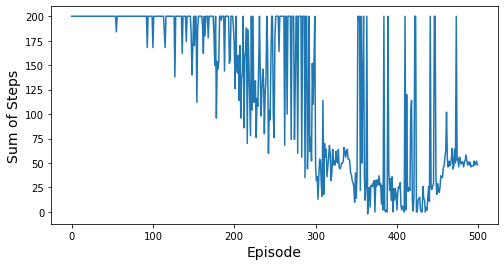

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(all_rewards2)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of Steps", fontsize=14)
plt.show()

In [11]:
first_win = -1
for i,value in enumerate(all_rewards2):
  if value < 200:
    first_win = i
    break

In [ ]:
for i in all_rewards:
    if i > 0:
        print(i)

In [12]:
print("mean reward: ",np.mean(all_rewards2),", best reward:",np.min(all_rewards2),", first win episode:",first_win)

mean reward:  127.006 , best reward: -2.0 , first win episode: 55


In [13]:
np.mean(all_rewards2[:200]),np.mean(all_rewards2[:300]),np.mean(all_rewards2[:400]),np.mean(all_rewards2[:500]),

(194.66, 179.47, 147.0525, 127.006)

# **Test**

In [14]:
# env = gym.make("MountainCar-v0")
import keras

loaded_model = keras.models.load_model('original_mlp2_500.h5')

trials = 100
trial_len = 200
all_rewards_test = []
for trial in range(trials):
    cur_state = env.reset().reshape(1, 2)
    for step in range(trial_len):
        action = np.argmax(loaded_model.predict(cur_state)[0])
        cur_state, reward, done, _ = env.step(action)
        cur_state = cur_state.reshape(1, 2)
        if done:
            env.reset()
            break
    all_rewards_test.append(step+1)
    print("Iteration: {} Score: -{}".format(trial, step+1))

Iteration: 0 Score: -165
Iteration: 1 Score: -162
Iteration: 2 Score: -165
Iteration: 3 Score: -163
Iteration: 4 Score: -160
Iteration: 5 Score: -168
Iteration: 6 Score: -161
Iteration: 7 Score: -159
Iteration: 8 Score: -162
Iteration: 9 Score: -166
Iteration: 10 Score: -167
Iteration: 11 Score: -164
Iteration: 12 Score: -164
Iteration: 13 Score: -161
Iteration: 14 Score: -163
Iteration: 15 Score: -162
Iteration: 16 Score: -162
Iteration: 17 Score: -166
Iteration: 18 Score: -164
Iteration: 19 Score: -164
Iteration: 20 Score: -162
Iteration: 21 Score: -160
Iteration: 22 Score: -161
Iteration: 23 Score: -163
Iteration: 24 Score: -162
Iteration: 25 Score: -167
Iteration: 26 Score: -161
Iteration: 27 Score: -159
Iteration: 28 Score: -159
Iteration: 29 Score: -161
Iteration: 30 Score: -166
Iteration: 31 Score: -167
Iteration: 32 Score: -159
Iteration: 33 Score: -159
Iteration: 34 Score: -166
Iteration: 35 Score: -161
Iteration: 36 Score: -160
Iteration: 37 Score: -164
Iteration: 38 Score: -

In [50]:
first_win = -1
for i,value in enumerate(all_rewards_test):
  if value < 200:
    first_win = i
    break

In [51]:
print("mean reward: ",np.mean(all_rewards_test),", best reward:",np.min(all_rewards_test),", first win episode:",first_win)

mean reward:  145.27 , best reward: 88 , first win episode: 0


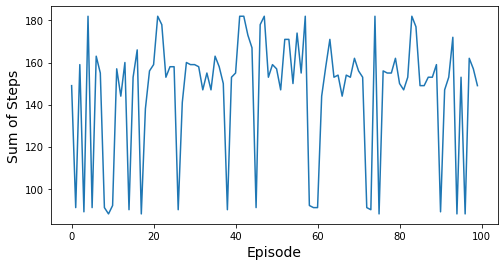

In [45]:
plt.figure(figsize=(8, 4))
plt.plot(all_rewards_test)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of Steps", fontsize=14)
plt.show()